In [3]:
######## Import useful libraries ###########


import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 

# Predictive model

## I. Preparing Tabular Data

#### Upload pickled data

In [2]:
# Opening the Pickle train data set X
with open("train_TFIDF_SVD.pickle", 'rb') as f:
    train = pickle.load(f)

In [92]:
# Opening the Pickle validation set X
with open("test_TFIDF_SVD.pickle", 'rb') as f:
    test = pickle.load(f)

In [4]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_11,TFIDF_feature_12,TFIDF_feature_13,TFIDF_feature_14,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,-0.058177,-0.018905,-0.014720,0.073910,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,0.133348,-0.029146,-0.033790,0.042279,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,0.011762,-0.000776,-0.051565,0.001984,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139


In [8]:
test.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_12,TFIDF_feature_13,TFIDF_feature_14,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price
11,New vs pi k body mists,1,Beauty,Fragrance,Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,0.002800,...,0.013971,-0.024795,0.021369,-0.031796,-0.003464,-0.004059,-0.056016,-0.001273,0.082264,3.555348
12,Black Skater dress,2,Women,Dresses,"Above Knee, Mini",rue,16.0,0,"Xl, great condition",0.009422,...,0.078102,-0.011156,0.039841,0.018697,-0.059675,-0.016977,-0.014195,-0.068884,-0.027390,2.833213
18,"Too Faced Limited ""Merry Macaroons""",1,Beauty,Makeup,Makeup Palettes,Too Faced,25.0,1,This AUTHENTIC pallete by Too Faced is brand n...,0.008357,...,-0.043025,-0.047108,0.067794,0.072071,0.025476,-0.072778,0.002481,0.062430,0.010215,3.258097


#### 2) Splitting data into training and validation sets

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 3) Dealing with categorical variables

In [5]:
# Brand

print("Handling categorical variables for 'brand_name'...")
lbl_enc_brand = LabelEncoder()

lbl_enc_brand.fit(np.hstack([train.brand_name, test.brand_name]))
train['brand'] = lbl_enc_brand.transform(train.brand_name)
test['brand'] = lbl_enc_brand.transform(test.brand_name)

print("Finished!")

Handling categorical variables for 'brand_name'...
Finished!


In [6]:
# Main category

print("Handling categorical variables for 'main_cat'...")
lbl_enc_main_cat = LabelEncoder()

lbl_enc_main_cat.fit(np.hstack([train.main_cat, test.main_cat]))
train['main_category'] = lbl_enc_main_cat.transform(train.main_cat)
test['main_category'] = lbl_enc_main_cat.transform(test.main_cat)

print("Finished!")

Handling categorical variables for 'main_cat'...
Finished!


In [7]:
# Subcategory 1

print("Handling categorical variables for 'subcat_1'...")
lbl_enc_subcat_1 = LabelEncoder()

lbl_enc_subcat_1.fit(np.hstack([train.subcat_1, test.subcat_1]))
train['category_1'] = lbl_enc_subcat_1.transform(train.subcat_1)
test['category_1'] = lbl_enc_subcat_1.transform(test.subcat_1)

print("Finished!")

Handling categorical variables for 'subcat_1'...
Finished!


In [8]:
# Subcategory 2

print("Handling categorical variables for 'subcat_2'...")
lbl_enc_subcat_2 = LabelEncoder()

lbl_enc_subcat_2.fit(np.hstack([train.subcat_2, test.subcat_2]))
train['category_2'] = lbl_enc_subcat_2.transform(train.subcat_2)
test['category_2'] = lbl_enc_subcat_2.transform(test.subcat_2)

print("Finished!")

Handling categorical variables for 'subcat_2'...
Finished!


In [9]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,brand,main_category,category_1,category_2
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3523,1,29,162
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,4137,9,95,69
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,78,9,90,626


In [20]:
test.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,main_category
11,New vs pi k body mists,1,Beauty,Fragrance,Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,0.002800,...,-0.003464,-0.004059,-0.056016,-0.001273,0.082264,3.555348,4457,39,659,0
12,Black Skater dress,2,Women,Dresses,"Above Knee, Mini",rue,16.0,0,"Xl, great condition",0.009422,...,-0.059675,-0.016977,-0.014195,-0.068884,-0.027390,2.833213,4750,33,2,9
18,"Too Faced Limited ""Merry Macaroons""",1,Beauty,Makeup,Makeup Palettes,Too Faced,25.0,1,This AUTHENTIC pallete by Too Faced is brand n...,0.008357,...,0.025476,-0.072778,0.002481,0.062430,0.010215,3.258097,4278,59,374,0


#### 4) Vectorising the item full description

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 5) Forming final sets

In [10]:
y_train = train.price
y_valid = test.price
X_train = train.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description'], axis=1)
X_valid = test.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description'], axis=1)

In [11]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,brand,main_category,category_1,category_2
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3523,1,29,162
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,4137,9,95,69
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,78,9,90,626


In [12]:
y_train.head(3)

1    52.0
2    10.0
6    64.0
Name: price, dtype: float64

#### 6) Saving pickle

In [13]:
#Saving our data-sets
y_train.to_pickle("y_train.pickle")
y_valid.to_pickle("y_valid.pickle")
X_train.to_pickle("X_train.pickle")
X_valid.to_pickle("X_valid.pickle")

## II. Fitting a predictive model

In [4]:
# Opening the Pickle train data set X
with open("X_train.pickle", 'rb') as f:
    X_train = pickle.load(f)

In [5]:
# Opening the Pickle train data set y
with open("y_train.pickle", 'rb') as f:
    y_train = pickle.load(f)

In [6]:
# Opening the Pickle validation set X
with open("X_valid.pickle", 'rb') as f:
    X_valid = pickle.load(f)

In [7]:
# Opening the Pickle test data set y
with open("y_valid.pickle", 'rb') as f:
    y_valid = pickle.load(f)

In [8]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,brand,main_category,category_1,category_2
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3523,1,29,162
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,4137,9,95,69
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,78,9,90,626


## Linear regression

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model_lm = lm.fit(X_train, y_train)

In [ ]:
# save the model to disk
filename = 'finalized_model_linear.sav'
pickle.dump(model_lm, open(filename, 'wb'))

In [9]:
# load the model from disk
filename = 'finalized_model_linear.sav'
lm = pickle.load(open(filename, 'rb'))

In [ ]:
predictions_lm = lm.predict(X_valid)

In [45]:
Y = y_valid.reset_index()
Y['price_prediction'] = predictions_lm
Y = Y.drop(['index'], axis=1)

In [46]:
Y.head(3)

,price,price_prediction
0,34.0,24.292815
1,16.0,35.763377
2,25.0,41.994655


In [47]:
# The coefficients
print('Coefficients: \n', lm.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_lm))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_valid, predictions_lm))

Coefficients: 
 [ -2.61807098e+00  -6.38631731e+00  -5.69532001e+00  -1.88862636e+00
   8.34433690e+00  -2.90021421e+01   1.73917323e+01   1.92520585e+01
   5.05688195e+00   1.63455336e+01   2.66002899e+01  -5.23414741e+01
  -4.25555524e+01  -5.55969875e+01   2.66300152e+01   5.38227314e+01
  -9.86590090e+00   4.39790836e+00  -4.36473243e+01  -1.82371890e+00
   3.71506579e+01  -3.42528149e+01  -1.02019017e-03   9.50327123e-01
  -1.93415547e-02  -4.11775442e-03]
Mean squared error: 1888.89
R-squared: 0.05


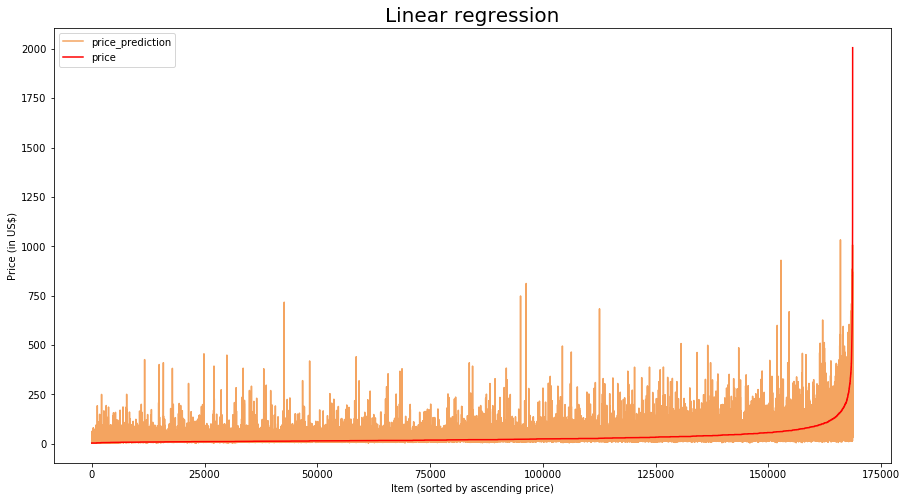

In [64]:
# Plot outputs
Y.sort_values(by=['price'], inplace=True)
plt.figure(figsize=(15,8))
x=range(len(Y.price))
plt.plot(x,Y.price_prediction,'sandybrown')
plt.plot(x,Y.price,'red')
plt.title ('Linear regression', fontsize = 20)
plt.ylabel('Price (in US\$)')
plt.xlabel('Item (sorted by ascending price)')
plt.legend()

plt.show()

### Multi-layer Perceptron regressor

In [22]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()
model_mlpr = mlpr.fit(X_train, y_train)

In [23]:
# save the model to disk
filename = 'finalized_model_mlpr.sav'
pickle.dump(model_mlpr, open(filename, 'wb'))

In [49]:
# load the model from disk
filename = 'finalized_model_mlpr.sav'
mlpr = pickle.load(open(filename, 'rb'))

In [50]:
predictions_mlpr = mlpr.predict(X_valid)

In [51]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_mlpr))

Mean squared error: 1662.88


In [52]:
Y = y_valid.reset_index()
Y['price_prediction'] = predictions_mlpr
Y = Y.drop(['index'], axis=1)

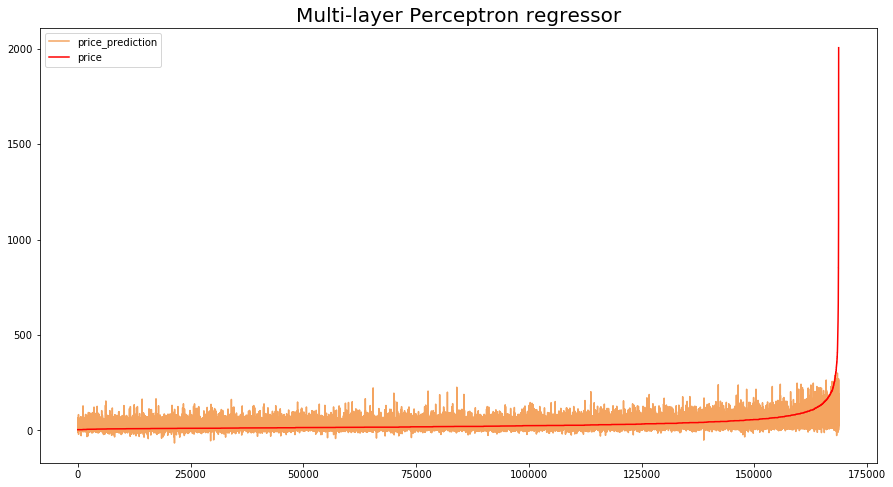

In [53]:
# Plot outputs
Y.sort_values(by=['price'], inplace=True)
plt.figure(figsize=(15,8))
x=range(len(Y.price))
plt.plot(x,Y.price_prediction,'sandybrown')
plt.plot(x,Y.price,'red')
plt.title ('Multi-layer Perceptron regressor', fontsize = 20)
plt.ylabel('Price (in US\$)')
plt.xlabel('Item (sorted by ascending price)')
plt.legend()

plt.show()

### A random forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
model_RFR = RFR.fit(X_train, y_train)

In [56]:
# save the model to disk
filename = 'finalized_model_RFR.sav'
pickle.dump(model_RFR, open(filename, 'wb'))

In [57]:
# load the model from disk
filename = 'finalized_model_RFR.sav'
RFR = pickle.load(open(filename, 'rb'))

In [58]:
predictions_RFR = RFR.predict(X_valid)

In [59]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_RFR))

Mean squared error: 1326.79


In [60]:
Y = y_valid.reset_index()
Y['price_prediction'] = predictions_RFR
Y = Y.drop(['index'], axis=1)

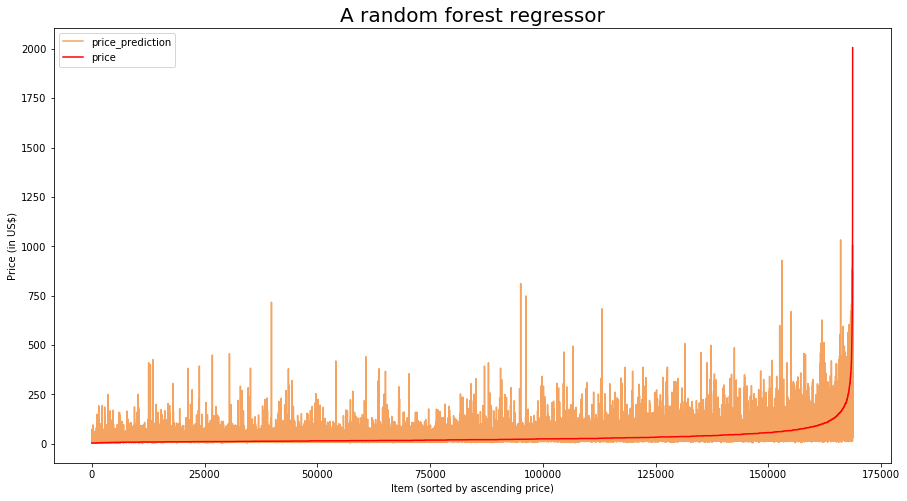

In [63]:
# Plot outputs
Y.sort_values(by=['price'], inplace=True)
plt.figure(figsize=(15,8))
x=range(len(Y.price))
plt.plot(x,Y.price_prediction,'sandybrown')
plt.plot(x,Y.price,'red')
plt.title ('A random forest regressor', fontsize = 20)
plt.ylabel('Price (in US\$)')
plt.xlabel('Item (sorted by ascending price)')
plt.legend()

plt.show()

## III. Exploring predicted values

In [67]:
res = np.abs(y_valid - predictions_RFR)

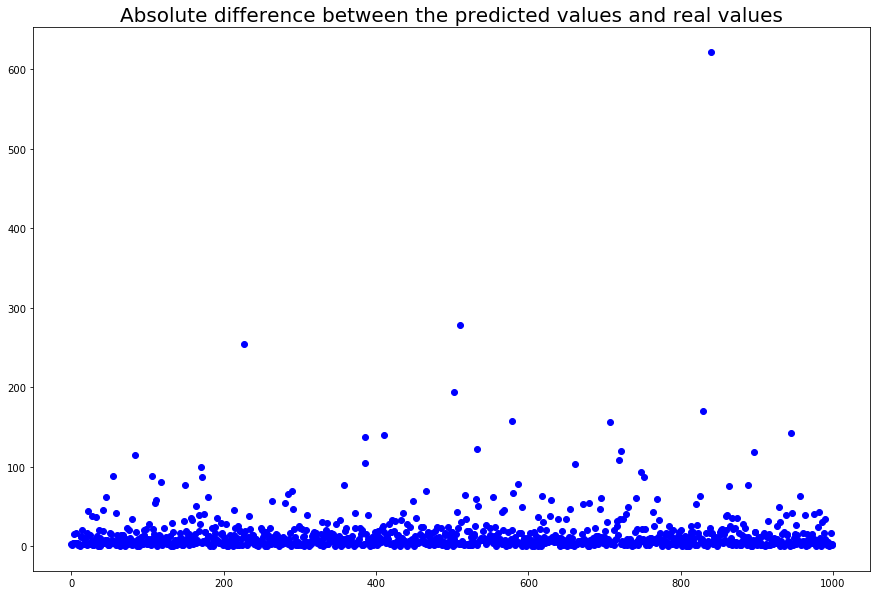

In [68]:
plt.figure(figsize=(15,10))
nb_points = 1000
plt.scatter(range(nb_points), res[0:nb_points],  color='blue')
plt.title ('Absolute difference between the predicted values and real values', fontsize = 20)
plt.show()

In [69]:
print('Minimal absolute difference between the prediction and real values is', round(res.min()), 'and maximum absolute value is', res.max())

Minimal absolute difference between the prediction and real values is 0.0 and maximum absolute value is 1901.4


#### We are going now to look for the categories that were worst predicted choosing the level in such a way that the amount of poorly predicted goods does not exceed 30 percent

In [90]:
# Choosing the level of difference between the predicted values and real price
level = 14
print('The percentage of the predicted values with an absolute difference more than', level, '$ is',round(len(res[res > level])/len(res),3))

The percentage of the predicted values with an absolute difference more than 14 $ is 0.3


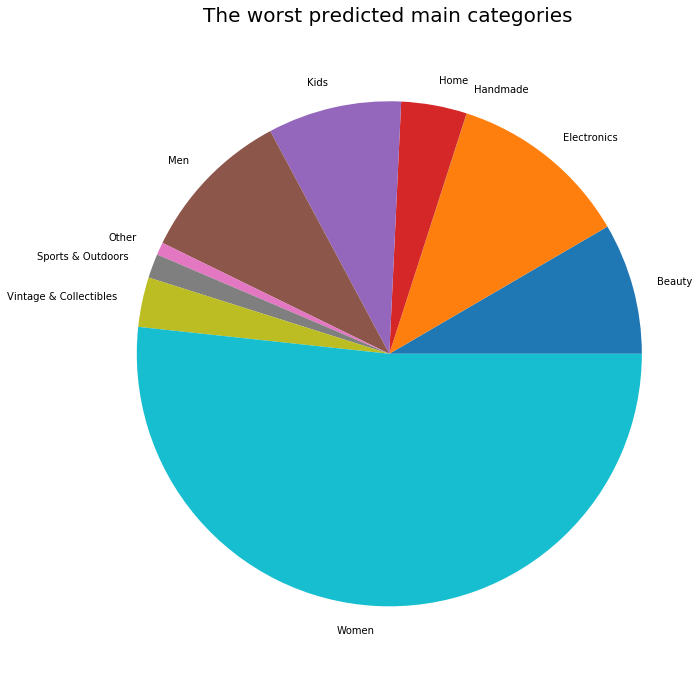

In [93]:
# Pie chart : 
plt.figure(figsize = (10,12))
test.name.groupby(test.main_cat[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted main categories', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

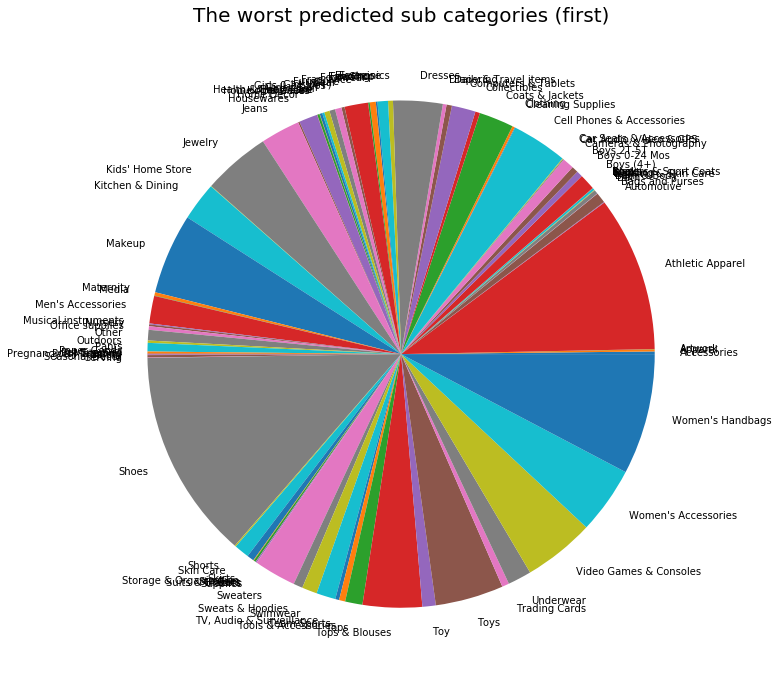

In [94]:
# Pie chart : 
plt.figure(figsize = (10,12))
test.name.groupby(test.subcat_1[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted sub categories (first)', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

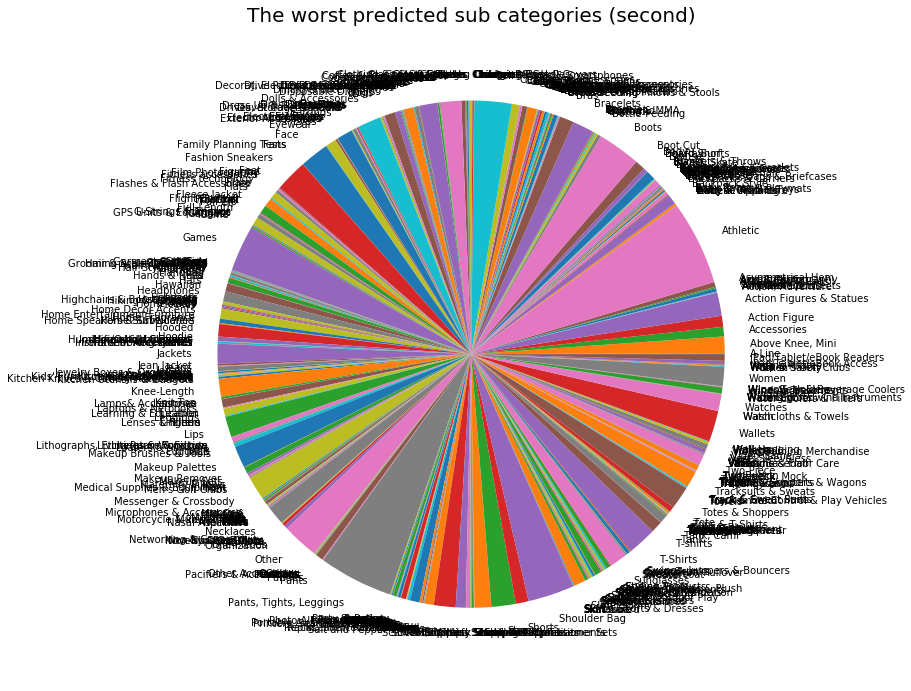

In [95]:
# Pie chart : 
plt.figure(figsize = (10,12))
test.name.groupby(test.subcat_2[res[res > level].index]).count().plot(kind = 'pie')
plt.title ('The worst predicted sub categories (second)', fontsize = 20)
plt.axis('equal')
plt.ylabel('')